In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import tikzplotlib
%matplotlib inline

from Dirichlet_exp_utils import *

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

ModuleNotFoundError: No module named 'tikzplotlib'

In [2]:
# import all elections from 1949 to 2017

elections_1949_df = pd.read_csv('Bundestagswahlen_clean/elections_1949.csv')
elections_1953_df = pd.read_csv('Bundestagswahlen_clean/elections_1953.csv')
elections_1957_df = pd.read_csv('Bundestagswahlen_clean/elections_1957.csv')
elections_1961_df = pd.read_csv('Bundestagswahlen_clean/elections_1961.csv')
elections_1965_df = pd.read_csv('Bundestagswahlen_clean/elections_1965.csv')
elections_1969_df = pd.read_csv('Bundestagswahlen_clean/elections_1969.csv')
elections_1972_df = pd.read_csv('Bundestagswahlen_clean/elections_1972.csv')
elections_1976_df = pd.read_csv('Bundestagswahlen_clean/elections_1976.csv')
elections_1980_df = pd.read_csv('Bundestagswahlen_clean/elections_1980.csv')
elections_1983_df = pd.read_csv('Bundestagswahlen_clean/elections_1983.csv')
elections_1987_df = pd.read_csv('Bundestagswahlen_clean/elections_1987.csv')
elections_1990_df = pd.read_csv('Bundestagswahlen_clean/elections_1990.csv')
elections_1994_df = pd.read_csv('Bundestagswahlen_clean/elections_1994.csv')
elections_1998_df = pd.read_csv('Bundestagswahlen_clean/elections_1998.csv')
elections_2002_df = pd.read_csv('Bundestagswahlen_clean/elections_2002.csv')
elections_2005_df = pd.read_csv('Bundestagswahlen_clean/elections_2005.csv')
elections_2009_df = pd.read_csv('Bundestagswahlen_clean/elections_2009.csv')
elections_2013_df = pd.read_csv('Bundestagswahlen_clean/elections_2013.csv')
elections_2017_df = pd.read_csv('Bundestagswahlen_clean/elections_2017.csv')

years = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983, 1987, 
         1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]

elections_1949_df.head(6)

,Unnamed: 0,Wahlkreis,Gebiet,Wahlberechtigte,Wähler,Ungültige,Gültige,CDU/CSU,CDU/CSU_prev,CDU/CSU:2,CDU/CSU:2_prev,SPD,SPD_prev,SPD:2,SPD:2_prev,FDP,FDP_prev,FDP:2,FDP:2_prev,GRUENE,GRUENE_prev,GRUENE:2,GRUENE:2_prev,LINKE,LINKE_prev,LINKE:2,LINKE:2_prev,AFD,AFD_prev,AFD:2,AFD:2_prev,KPD,KPD_prev,KPD:2,KPD:2_prev,BHE,BHE_prev,BHE:2,BHE:2_prev,OTHER,OTHER_prev,OTHER:2,OTHER:2_prev
0,2,1,Husum  Südtondern  Eiderstedt,117513.0,94615.0,1693.0,92922.0,28901.0,0,0,0,19987.0,0,0,0,11817.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1405.0,0,0,0,0,0,0,0,30812.0,0,0,0
1,3,2,Flensburg,131177.0,112871.0,1431.0,111440.0,0.0,0,0,0,16801.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1895.0,0,0,0,0,0,0,0,92744.0,0,0,0
2,4,3,Schleswig  Eckernförde,123483.0,103269.0,1376.0,101893.0,28850.0,0,0,0,17489.0,0,0,0,1101.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1530.0,0,0,0,0,0,0,0,52923.0,0,0,0
3,5,4,Norder- und Süderdithmarschen,116535.0,94709.0,1765.0,92944.0,30412.0,0,0,0,24129.0,0,0,0,3950.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1857.0,0,0,0,0,0,0,0,32596.0,0,0,0
4,6,5,Rendsburg,133432.0,110887.0,1756.0,109131.0,41567.0,0,0,0,24087.0,0,0,0,2893.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2679.0,0,0,0,0,0,0,0,37905.0,0,0,0
5,7,6,Kiel,151052.0,124920.0,2347.0,122573.0,64894.0,0,0,0,43712.0,0,0,0,1766.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6690.0,0,0,0,0,0,0,0,5511.0,0,0,0


In [3]:
elections_1949_df.columns

Index(['Unnamed: 0', 'Wahlkreis', 'Gebiet', 'Wahlberechtigte', 'Wähler',
       'Ungültige', 'Gültige', 'CDU/CSU', 'CDU/CSU_prev', 'CDU/CSU:2',
       'CDU/CSU:2_prev', 'SPD', 'SPD_prev', 'SPD:2', 'SPD:2_prev', 'FDP',
       'FDP_prev', 'FDP:2', 'FDP:2_prev', 'GRUENE', 'GRUENE_prev', 'GRUENE:2',
       'GRUENE:2_prev', 'LINKE', 'LINKE_prev', 'LINKE:2', 'LINKE:2_prev',
       'AFD', 'AFD_prev', 'AFD:2', 'AFD:2_prev', 'KPD', 'KPD_prev', 'KPD:2',
       'KPD:2_prev', 'BHE', 'BHE_prev', 'BHE:2', 'BHE:2_prev', 'OTHER',
       'OTHER_prev', 'OTHER:2', 'OTHER:2_prev'],
      dtype='object')

In [4]:
# drop column "Gebiet"
#small_df = small_df.drop(columns=['Gebiet'])

# apply the Laplace Bridge
def Dirichlet_bridge_mu(alpha):
    alpha = np.array(alpha, dtype='int')
    k = len(alpha)
    C = 1/k * np.sum(np.log(alpha))
    return(np.log(alpha) - C)

def Dirichlet_bridge_Sigma(alpha):
    K = len(alpha)
    Sigma = np.zeros((K, K))
    sum_inv_alphas = np.sum(1/alpha)
    for k in range(K):
        for l in range(K):
            x_ = -1/K * (1/alpha[k] + 1/alpha[l] - 1/K*sum_inv_alphas)
            if k == l:
                x_ += 1/alpha[k]
            Sigma[k,l] = x_
            
    return(Sigma)

def Dirichlet_bridge_alpha(mu, Sigma):
    K = len(mu)
    Sigma_diag = np.diag(Sigma)
    sum_m_exp = np.sum(np.exp(-mu))
    return(1/Sigma_diag * (1 - 2/K + np.exp(mu)/K**2 * sum_m_exp))


def softmax_vector(mu):
    mu = np.array(mu)
    return(np.exp(mu)/np.sum(np.exp(mu)))

def softmax_batch(mu_batch):
    mu_batch = np.array(mu_batch)
    return(np.exp(mu_batch)/np.sum(np.exp(mu_batch), 1)[:,np.newaxis])

In [5]:
#test some alpha values

test_a = np.arange(1, 10)
test_mu = Dirichlet_bridge_mu(test_a)
test_Sigma = Dirichlet_bridge_Sigma(test_a)
test_a2 = Dirichlet_bridge_alpha(test_mu, test_Sigma)
assert(np.allclose(test_a, test_a2))

# German elections with Dirichlet + GP

In [6]:
# Select the 10 Wahlkreise (Ger + 9 counties) with the 9 parties

cols = ['Gebiet', 'CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']
regions = ['Bundesgebiet ohne Berlin', 'Bundesgebiet','Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 
           'Bremen', 'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz', 'Baden-Württemberg', 'Bayern', 
           'BUNDESGEBIET OHNE BERLIN', 'SCHLESWIG-HOLSTEIN', 'HAMBURG', 'NIEDERSACHSEN', 'BREMEN',
           'NORDRHEIN-WESTFALEN', 'HESSEN', 'RHEINLAND-PFALZ', 'BADEN-WUERTTEMBERG', 'BAYERN']

parties = ['CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']

n_regions = 10
n_parties = 9

medium_df = pd.DataFrame(columns=cols)
    
#if you want to ignore election of 2009 to let the GP infer it
ignore_2009 = False
    
#if you want to infer the votes in a specific county after a cutoff point t
remove_BY_from_1990 = False

#if you want to predict the next three elections (2021, 2025, 2029)
predict_2029 = True


if ignore_2009:
    dfs = [elections_1949_df, elections_1953_df, elections_1957_df, elections_1961_df, elections_1965_df,
              elections_1969_df, elections_1972_df, elections_1976_df, elections_1980_df, elections_1983_df,
              elections_1987_df, elections_1990_df, elections_1994_df, elections_1998_df, elections_2002_df,
              elections_2005_df, 
              elections_2013_df, elections_2017_df]
else:
    dfs = [elections_1949_df, elections_1953_df, elections_1957_df, elections_1961_df, elections_1965_df,
          elections_1969_df, elections_1972_df, elections_1976_df, elections_1980_df, elections_1983_df,
          elections_1987_df, elections_1990_df, elections_1994_df, elections_1998_df, elections_2002_df,
          elections_2005_df, elections_2009_df, elections_2013_df, elections_2017_df]
    

for df in dfs:
    df_ = df[cols]
    df_ = df_.loc[df['Gebiet'].isin(regions)]
    medium_df = medium_df.append(df_)

    
if remove_BY_from_1990:
    regions_single = ['SH', 'HH', 'NS', 'HB', 'NW', 'HS', 'RP', 'BW', 'BY', 'ger'] 
    dropped_elections = [1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]
    medium_df = medium_df.reset_index(drop=True)
    regions = regions_single* 19
    years_ = [y for y in years for i in range(10)]
    medium_df['year'] = years_
    medium_df = medium_df.drop(medium_df[((medium_df['Gebiet'] == 'Bayern') &\
                                          (medium_df['year'].isin(dropped_elections)))].index)
    medium_df = medium_df.drop(columns=['year'])
     

medium_df = medium_df.drop(columns=['Gebiet'])

#if you want to ignore elections from 1990 onwards for Bavaria
if remove_BY_from_1990:
    assert(19*n_regions - 8 == len(medium_df))
elif ignore_2009:
    assert(18*n_regions == len(medium_df))
else:
    assert(19*n_regions == len(medium_df))

#make sure that either only one or no condition is on at the same time
assert(np.sum([remove_BY_from_1990, ignore_2009]) <= 1)
    
medium_df

,CDU/CSU,SPD,FDP,GRUENE,LINKE,AFD,KPD,BHE,OTHER
14,428956.0,413257.0,103492.0,0,0,0,43744.0,0,408222.0
23,178786.0,358873.0,143371.0,0,0,0,76747.0,0,147667.0
58,593691.0,1125295.0,252141.0,0,0,0,104132.0,0,1290706.0
62,51290.0,104509.0,39228.0,0,0,0,20530.0,0,88308.0
129,2481523.0,2109172.0,581456.0,0,0,0,513225.0,0,1041167.0
152,454437.0,684042.0,597081.0,0,0,0,142539.0,0,250179.0
168,702125.0,408905.0,226625.0,0,0,0,89026.0,0,4875.0
202,1087828.0,655506.0,482381.0,0,0,0,175911.0,0,343827.0
250,1380448.0,1075416.0,404145.0,0,0,0,195852.0,0,1671762.0
251,7359084.0,6934975.0,2829920.0,0,0,0,1361706.0,0,5246713.0


In [7]:

# if you want to train without the year 2009
if ignore_2009:
    T = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983,
         1987, 1990, 1994, 1998, 2002, 2005, 2013, 2017]
else:
    T = [1949, 1953, 1957, 1961, 1965, 1969, 1972, 1976, 1980, 1983,
     1987, 1990, 1994, 1998, 2002, 2005, 2009, 2013, 2017]



P = np.arange(1,n_parties + 1)
C = np.arange(1,n_regions + 1)

# if you removed the elections from 1990 onwards for Bavaria
if remove_BY_from_1990:
    X = np.zeros((len(T)*len(C)*len(P) - 8 * n_parties, 3))
else:
    X = np.zeros((len(T)*len(C)*len(P), 3))

print(np.shape(X))
idx = 0
for t in T:
    for c in C:
        for p in P:
            #if you want to exclude a specific county c after a certain year t
            if remove_BY_from_1990:
                if t >= 1990 and c == 9:
                    continue
            X[idx] = [t, c, p]
            idx += 1
            
print(X[:-10])

(1710, 3)
[[1.949e+03 1.000e+00 1.000e+00]
 [1.949e+03 1.000e+00 2.000e+00]
 [1.949e+03 1.000e+00 3.000e+00]
 ...
 [2.017e+03 9.000e+00 6.000e+00]
 [2.017e+03 9.000e+00 7.000e+00]
 [2.017e+03 9.000e+00 8.000e+00]]


In [8]:
# build the kernel

def k_SEK(x, x_, s=1, l=2):
    return(s*np.exp(-(x-x_)**2 / (2*l**2)))

def k_RQ(x, x_, s=1, l=10, a=0.1):
    return(s**2 * (1 + (x-x_)**2/(2*a*l**2)))**(-a)

def k_dirac_soft(x, x_):
    if x == x_:
        return(1)
    else:
        return(0.1)

n = len(X)
K_XX = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        t_i = X[i,0]
        c_i = X[i,1]
        p_i = X[i,2]
        t_j = X[j,0]
        c_j = X[j,1]
        p_j = X[j,2]
        #K_XX[i, j] = k_SEK(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        K_XX[i, j] = k_RQ(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        
print(np.shape(K_XX))

(1710, 1710)


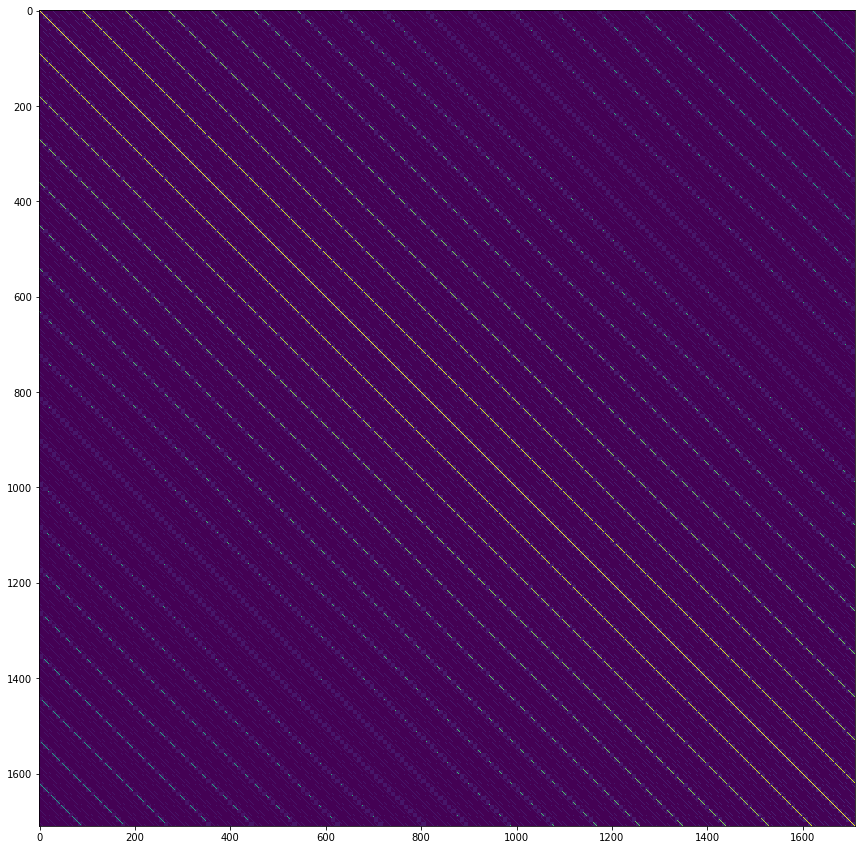

In [9]:
plt.figure(figsize=(15, 15))
plt.imshow(K_XX)
plt.show()

In [10]:
# prep y data

#prior for the dirichlet
alpha_0 = 1

t0 = time.time()
Y_mu = np.array([Dirichlet_bridge_mu(np.array(row[1].values) + alpha_0) for row in medium_df.iterrows()])
t1 = time.time()
print("mu transformation time: ", t1 - t0)
Y_mu = Y_mu.reshape(-1)

#print(Y_mu)

t0 = time.time()
Y_Sigma = [Dirichlet_bridge_Sigma(np.array(row[1].values) + alpha_0) for row in medium_df.iterrows()]
t1 = time.time()
print("Sigma transformation time: ", t1 - t0)

Y_Sigma_block = np.zeros((n,n))
idx = 0
for S in Y_Sigma:
    Y_Sigma_block[idx:idx+n_parties, idx:idx+n_parties] = S
    idx += n_parties

mu transformation time:  0.01801586151123047
Sigma transformation time:  0.02113056182861328


In [11]:
# calculate GP stuff
from numpy.random import randn, multivariate_normal
from numpy.linalg import cholesky, solve
from scipy.linalg import cho_solve, cho_factor
import time

G_ = K_XX + Y_Sigma_block
t0_factor = time.time()
G = cho_factor(G_)
t1_factor = time.time()
time_factor = t1_factor - t0_factor
print("time for cho factor: ", time_factor)

time for cho factor:  0.018336057662963867


In [12]:
# if you want to predict the next three elections
if predict_2029:
    T_x = np.arange(1949, 2029)
else:
    T_x = np.arange(1949, 2017)

P_x = np.arange(1,n_parties + 1)
C_x = np.arange(1,n_regions + 1)

x = np.zeros((len(T_x)*len(C_x)*len(P_x), 3))
print(np.shape(x))
idx = 0
for t in T_x:
    for c in C_x:
        for p in P_x:
            x[idx] = [t, c, p]
            idx += 1

n_ = len(x)
K_xX = np.zeros((n_, n))
for i in range(n_):
    for j in range(n):
        t_i = x[i,0]
        c_i = x[i,1]
        p_i = x[i,2]
        t_j = X[j,0]
        c_j = X[j,1]
        p_j = X[j,2]
        #K_xX[i, j] = k_SEK(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        K_xX[i, j] = k_RQ(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        
print(np.shape(K_xX))

K_xx = np.zeros((n_, n_))
for i in range(n_):
    for j in range(n_):
        t_i = x[i,0]
        c_i = x[i,1]
        p_i = x[i,2]
        t_j = x[j,0]
        c_j = x[j,1]
        p_j = x[j,2]
        #K_xx[i, j] = k_SEK(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        K_xx[i, j] = k_RQ(t_i, t_j) * k_dirac_soft(c_i, c_j) * k_dirac_soft(p_i, p_j)
        
print(np.shape(K_xx))

(7200, 3)
(7200, 1710)
(7200, 7200)


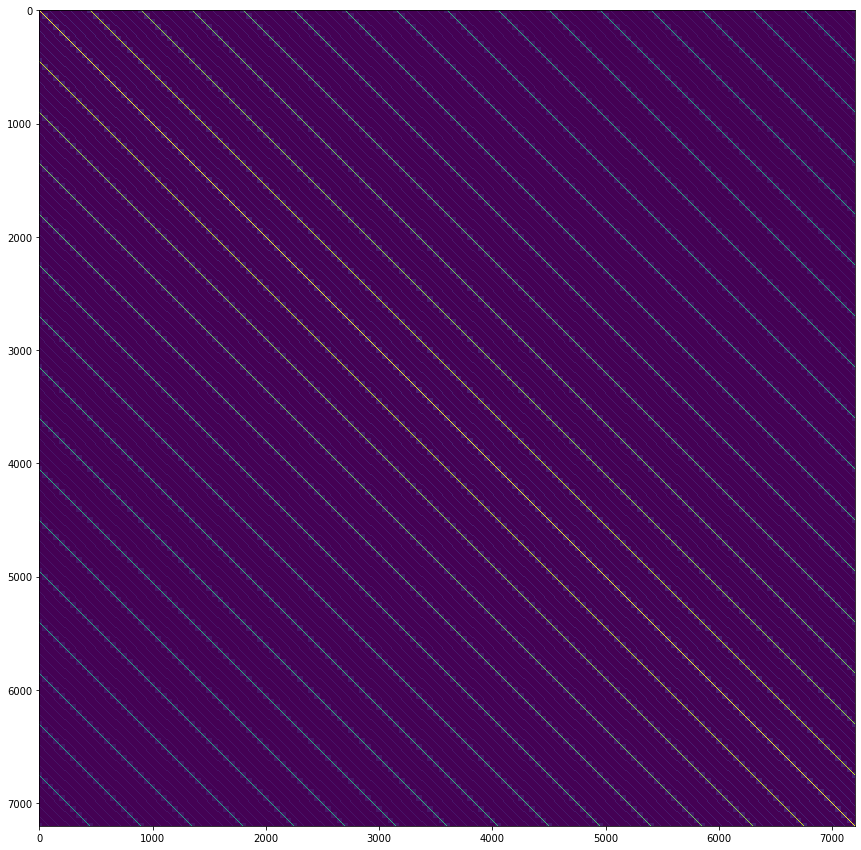

In [13]:
plt.figure(figsize=(15,15))
plt.imshow(K_xx)
plt.show();

In [14]:
# do some inference 
t0_solve = time.time()
A = cho_solve(G, K_xX.T).T
t1_solve = time.time()
time_solve = t1_solve-t0_solve
print("cho solve: ", time_solve)

out = {}

# # posterior p(f_x|Y) = N(f_x,mpost,vpost)
t0_mu = time.time()
out["mpost"] = A @ Y_mu #m(x) + A @ (Y - mX)  # mean
t1_mu = time.time()
time_mu = t1_mu - t0_mu
print("matrix multiplication with mu: ", time_mu)
print(np.shape(out['mpost']))

t0_cov = time.time()
out["vpost"] = K_xx - A @ K_xX.T  # covariance
t1_cov = time.time()
time_cov = t1_cov-t0_cov
print("Computing Kernel for prediction: ", time_cov)
print(np.shape(out['vpost']))

print("total inference time: ", time_factor + time_solve + time_mu + time_cov)

n_GP_samples = 50

# ATTENTION: on small machines this makes the kernel die because it's too large
# just comment it out if you only want to use the mean
out["spost"] = multivariate_normal(
    out["mpost"].flatten(), out["vpost"], size=n_GP_samples
)

cho solve:  0.35549068450927734
matrix multiplication with mu:  0.0036907196044921875
(7200,)
Computing Kernel for prediction:  1.2959794998168945
(7200, 7200)
total inference time:  1.673496961593628


KeyboardInterrupt: 

In [ ]:
test_1 = out["mpost"]
test_1_v = np.diag(out["vpost"])
print(np.shape(test_1))
print(np.shape(test_1_v))

test_1 = test_1.reshape((-1, n_regions*n_parties))
test_1_v = test_1_v.reshape((-1, n_regions*n_parties))
print(np.shape(test_1))
print(np.shape(test_1_v))

test_1_SH = test_1[:, :n_parties]
test_1_HH = test_1[:, n_parties:2*n_parties]
test_1_NS = test_1[:, 2*n_parties:3*n_parties]
test_1_HB = test_1[:, 3*n_parties:4*n_parties]
test_1_NW = test_1[:, 4*n_parties:5*n_parties]
test_1_HS = test_1[:, 5*n_parties:6*n_parties]
test_1_RP = test_1[:, 6*n_parties:7*n_parties]
test_1_BW = test_1[:, 7*n_parties:8*n_parties]
test_1_BY = test_1[:, 8*n_parties:9*n_parties]
test_1_ger = test_1[:, 9*n_parties:10*n_parties]

test_1_SH_v = test_1_v[:, :n_parties]
test_1_HH_v = test_1_v[:, n_parties:2*n_parties]
test_1_NS_v = test_1_v[:, 2*n_parties:3*n_parties]
test_1_HB_v = test_1_v[:, 3*n_parties:4*n_parties]
test_1_NW_v = test_1_v[:, 4*n_parties:5*n_parties]
test_1_HS_v = test_1_v[:, 5*n_parties:6*n_parties]
test_1_RP_v = test_1_v[:, 6*n_parties:7*n_parties]
test_1_BW_v = test_1_v[:, 7*n_parties:8*n_parties]
test_1_BY_v = test_1_v[:, 8*n_parties:9*n_parties]
test_1_ger_v = test_1_v[:, 9*n_parties:10*n_parties]

print(np.shape(test_1_ger))
print(np.shape(test_1_ger_v))

In [ ]:
test_1_BY_df = pd.DataFrame(test_1_BY)
test_1_BY_df.columns = parties
test_1_BY_df['year'] = T_x

test_1_BY_df

In [ ]:
# Bridge back to Dirichlet land via softmax

sm_results_SH = softmax_batch(test_1_SH)
sm_cumulative_SH = np.cumsum(sm_results_SH, 1)

sm_results_HH = softmax_batch(test_1_HH)
sm_cumulative_HH = np.cumsum(sm_results_HH, 1)

sm_results_NS = softmax_batch(test_1_NS)
sm_cumulative_NS = np.cumsum(sm_results_NS, 1)

sm_results_HB = softmax_batch(test_1_HB)
sm_cumulative_HB = np.cumsum(sm_results_HB, 1)

sm_results_NW = softmax_batch(test_1_NW)
sm_cumulative_NW = np.cumsum(sm_results_NW, 1)

sm_results_HS = softmax_batch(test_1_HS)
sm_cumulative_HS = np.cumsum(sm_results_HS, 1)

sm_results_RP = softmax_batch(test_1_RP)
sm_cumulative_RP = np.cumsum(sm_results_RP, 1)

sm_results_BW = softmax_batch(test_1_BW)
sm_cumulative_BW = np.cumsum(sm_results_BW, 1)

sm_results_BY = softmax_batch(test_1_BY)
sm_cumulative_BY = np.cumsum(sm_results_BY, 1)

sm_results_ger = softmax_batch(test_1_ger)
sm_cumulative_ger = np.cumsum(sm_results_ger, 1)


In [ ]:
parties = ['CDU/CSU', 'SPD', 'FDP', 'GRUENE', 'LINKE', 'AFD', 'KPD', 'BHE', 'OTHER']

party_colors = {
    'CDU/CSU':'black',
    'SPD':'red',
    'FDP':'yellow',
    'GRUENE':'green',
    'LINKE':'magenta',
    'AFD':'deepskyblue',
    'KPD':'firebrick',
    'BHE':'orange',
    'OTHER':'grey'
}

In [ ]:
sm_results = [sm_results_SH, sm_results_HH, sm_results_NS, sm_results_HB, sm_results_NW, 
              sm_results_HS, sm_results_RP, sm_results_BW, sm_results_BY, sm_results_ger]

results_v = [test_1_SH_v, test_1_HH_v, test_1_NS_v, test_1_HB_v, test_1_NW_v,
             test_1_HS_v, test_1_RP_v, test_1_BW_v, test_1_BY_v, test_1_ger_v]

if ignore_2009:
    filenames = ['sm_SH_wo_2009.pdf', 'sm_HH_wo_2009.pdf', 'sm_NS_wo_2009.pdf',
                 'sm_HB_wo_2009.pdf', 'sm_NW_wo_2009.pdf', 'sm_HS_wo_2009.pdf', 'sm_RP_wo_2009.pdf', 
                 'sm_BW_wo_2009.pdf', 'sm_BY_wo_2009.pdf', 'sm_ger_wo_2009.pdf']
elif predict_2029:
    filenames = ['sm_SH_2029.pdf', 'sm_HH_2029.pdf', 'sm_NS_2029.pdf', 'sm_HB_2029.pdf', 'sm_NW_2029.pdf', 
                 'sm_HS_2029.pdf', 'sm_RP_2029.pdf', 'sm_BW_2029.pdf', 'sm_BY_2029.pdf', 'sm_ger_2029.pdf']
else:
    filenames = ['sm_SH.pdf', 'sm_HH.pdf', 'sm_NS.pdf', 'sm_HB.pdf', 'sm_NW.pdf', 
                 'sm_HS.pdf', 'sm_RP.pdf', 'sm_BW.pdf', 'sm_BY.pdf', 'sm_ger.pdf']


for j in range(len(sm_results)):
    
    r = sm_results[j]
    plot_elections_mean(r, x=T_x, parties=parties, party_colors=party_colors, filename=filenames[j], save=False, legend=False)

In [ ]:
sm_cum_results = [sm_cumulative_SH, sm_cumulative_HH, sm_cumulative_NS, sm_cumulative_HB, sm_cumulative_NW, 
                  sm_cumulative_HS, sm_cumulative_RP, sm_cumulative_BW, sm_cumulative_BY, sm_cumulative_ger]

filenames = ['election_SH.pdf', 'election_HH.pdf', 'election_NS.pdf', 'election_HB.pdf', 'election_NW.pdf', 
             'election_HS.pdf', 'election_RP.pdf', 'election_BW.pdf', 'election_BY.pdf', 'election_ger.pdf']

for i in range(len(sm_cum_results)):
    
    r = sm_cum_results[i]
    plot_elections_cum(r, x=T_x, parties=parties, party_colors=party_colors, save=False, filename=filenames[i], legend=False)

In [ ]:
# data prep for the GP+LM samples

election_GP_samples = out["spost"]
print(election_GP_samples.shape)

election_GP_samples = election_GP_samples.reshape((n_GP_samples,-1, n_regions*n_parties))
print(election_GP_samples.shape)

test_1_SH_GP_s = election_GP_samples[:, :, :n_parties]
test_1_HH_GP_s = election_GP_samples[:, :, n_parties:2*n_parties]
test_1_NS_GP_s = election_GP_samples[:, :, 2*n_parties:3*n_parties]
test_1_HB_GP_s = election_GP_samples[:, :, 3*n_parties:4*n_parties]
test_1_NW_GP_s = election_GP_samples[:, :, 4*n_parties:5*n_parties]
test_1_HS_GP_s = election_GP_samples[:, :, 5*n_parties:6*n_parties]
test_1_RP_GP_s = election_GP_samples[:, :, 6*n_parties:7*n_parties]
test_1_BW_GP_s = election_GP_samples[:, :, 7*n_parties:8*n_parties]
test_1_BY_GP_s = election_GP_samples[:, :, 8*n_parties:9*n_parties]
test_1_ger_GP_s = election_GP_samples[:, :, 9*n_parties:10*n_parties]

sm_results_SH_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_SH_GP_s]) 
sm_cumulative_SH_GP_s = np.cumsum(sm_results_SH_GP_s, 2)

sm_results_HH_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_HH_GP_s]) 
sm_cumulative_HH_GP_s = np.cumsum(sm_results_HH_GP_s, 2)

sm_results_NS_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_NS_GP_s]) 
sm_cumulative_NS_GP_s = np.cumsum(sm_results_NS_GP_s, 2)

sm_results_HB_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_HB_GP_s]) 
sm_cumulative_HB_GP_s = np.cumsum(sm_results_HB_GP_s, 2)

sm_results_NW_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_NW_GP_s]) 
sm_cumulative_NW_GP_s = np.cumsum(sm_results_NW_GP_s, 2)

sm_results_HS_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_HS_GP_s]) 
sm_cumulative_HS_GP_s = np.cumsum(sm_results_HS_GP_s, 2)

sm_results_RP_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_RP_GP_s]) 
sm_cumulative_RP_GP_s = np.cumsum(sm_results_RP_GP_s, 2)

sm_results_BW_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_BW_GP_s]) 
sm_cumulative_BW_GP_s = np.cumsum(sm_results_BW_GP_s, 2)

sm_results_BY_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_BY_GP_s]) 
sm_cumulative_BY_GP_s = np.cumsum(sm_results_BY_GP_s, 2)

sm_results_ger_GP_s = np.array([softmax_batch(s_i) for s_i in test_1_ger_GP_s]) 
sm_cumulative_ger_GP_s = np.cumsum(sm_results_ger_GP_s, 2)

print(np.shape(sm_results_SH_GP_s))
print(np.shape(sm_cumulative_SH_GP_s))

In [ ]:
# plot it

plot_elections_cum_samples(sm_cumulative_ger_GP_s, x=T_x, parties=parties, party_colors=party_colors, save=False, filename='elections_GP_samples.pdf', legend=False)

In [ ]:
sm_cum_results = [sm_cumulative_SH, sm_cumulative_HH, sm_cumulative_NS, sm_cumulative_HB, sm_cumulative_NW, 
                  sm_cumulative_HS, sm_cumulative_RP, sm_cumulative_BW, sm_cumulative_BY, sm_cumulative_ger]

if ignore_2009:
    filenames2 = ['election_SH_wo_2009.png', 'election_HH_wo_2009.png', 'election_NS_wo_2009.png', 
              'election_HB_wo_2009.png', 'election_NW_wo_2009.png', 'election_HS_wo_2009.png',
              'election_RP_wo_2009.png', 'election_BW_wo_2009.png', 'election_BY_wo_2009.png',
              'election_ger_wo_2009.png']
elif predict_2029:
    filenames2 = ['election_SH_2029.png', 'election_HH_2029.png', 'election_NS_2029.png', 
                  'election_HB_2029.png', 'election_NW_2029.png', 'election_HS_2029.png', 
                  'election_RP_2029.png', 'election_BW_2029.png', 'election_BY_2029.png', 'election_ger_2029.png']
else:
    filenames2 = ['election_SH.png', 'election_HH.png', 'election_NS.png', 'election_HB.png', 'election_NW.png',
              'election_HS.png', 'election_RP.png', 'election_BW.png', 'election_BY.png', 'election_ger.png']



for i in range(len(sm_cum_results)):
    
    r = sm_cum_results[i]
    v = np.sqrt(results_v[i])
    plot_elections_cum_std(r, v, x=T_x, parties=parties, party_colors=party_colors, save=False, filename=filenames2[i], legend=False)
    

In [ ]:
# combine everything: cumulative samples with std as color strength
def plot_elections_cum_samples_std(samples_cum, results_v, x, parties, party_colors, save=False, filename='test.pdf', legend=False, n_parties=9):
    
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.rc('axes', labelsize=20)
    legend_size=18
    lw_size=3
    
    sm_results_cum = samples_cum.mean(0)
    
    fig = plt.figure(figsize=(10, 5))
    plt.ylim((0.0, 1.00))
    plt.xlim((np.min(x), np.max(x)))
    
    #plot the means and fill between
    alpha_fill = 0.7
    alpha_samples = 1
    
    lb = 0
    r_prev = np.zeros(x.max() - x.min()+1)
    
    v_min, v_max = results_v.min(), results_v.max()
    for i in range(n_parties):
        
        c = party_colors[parties[i]]
        r = sm_results_cum[:,i].astype('float')
        n = len(r)
        v = results_v[:, i].astype('float')

        y_min, y_max = r.min(), r.max()
        x_min, x_max = x.min(), x.max()
        
        ax = plt.gca()
        line, = ax.plot(x, r, color=c, label = parties[i])
            
        zorder = line.get_zorder()
        
        z = np.empty((x_max - x_min+1, 1, 4), dtype=float)
        c_norm = 1/v * v_min
        rgb = mcolors.colorConverter.to_rgb(c)
        z[:,:,:3] = rgb
        z[:,:,-1] = c_norm.reshape(-1,1)
        z = z.reshape(1, -1, 4)
        
        im = ax.imshow(z, aspect='auto', extent=[x_min, x_max, lb, y_max], origin='lower', zorder=zorder, alpha=alpha_fill)
        
        xy = np.column_stack([x, r])
        xy_prev = np.column_stack([x, r_prev])[::-1]

        xy = np.vstack([[x_min, lb], xy, [x_max, lb], xy_prev])

        clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
        ax.add_patch(clip_path)
        im.set_clip_path(clip_path)
        
        lb = y_min
        r_prev = r
    
    #plot all samples
    for s in samples_cum:
        
        for i in range(n_parties):
            c = party_colors[parties[i]]
            
            plt.plot(x, s[:, i], label=parties[i], color=c, alpha=alpha_samples)
    
    
    if legend:
        leg = plt.legend(prop={'size': legend_size}) 
        # set the linewidth of each legend object
        for legobj in leg.legendHandles:
            legobj.set_linewidth(15.0)
        
    fig.tight_layout()
    if save:
        plt.savefig(filename)
        plt.show();

In [ ]:
# plot it

plot_elections_cum_samples_std(sm_cumulative_ger_GP_s, np.sqrt(test_1_ger_v), x=T_x, parties=parties,party_colors=party_colors, save=True, filename='elections_LM_GP_samples_std_2029.png', legend=False)

# compare this to original values

Running these cells only makes sense if we use the entirety of the training data

In [ ]:
if ignore_2009 or remove_BY_from_1990:
    raise(ValueError("The rest of the Jupyter Notebook doesn't make any sense if you are not using all training data"))

original_df = medium_df.reset_index(drop=True)
regions_single = ['SH', 'HH', 'NS', 'HB', 'NW', 'HS', 'RP', 'BW', 'BY', 'ger'] 
regions = regions_single* 19
years_ = [y for y in years for i in range(10)]
print(len(years))
original_df['region'] = regions
original_df['year'] = years_
original_df

In [ ]:
def prep_orig(region):
    orig = original_df.loc[original_df['region'] == region]
    orig = orig[parties].values 
    orig_norm = np.array(orig)/orig.sum(1).reshape(-1, 1)
    orig_norm_cum = np.cumsum(orig_norm, 1)
    
    return(orig_norm, orig_norm_cum)

filenames_orig = ['election_orig_SH.pdf', 'election_orig_HH.pdf',
                  'election_orig_NS.pdf', 'election_orig_HB.pdf', 'election_orig_NW.pdf',
                  'election_orig_HS.pdf', 'election_orig_RP.pdf', 'election_orig_BW.pdf', 
                  'election_orig_BY.pdf', 'election_orig_ger.pdf']

for i, reg in enumerate(regions_single):
    orig, orig_cum = prep_orig(reg)
    #plot_results(orig, x=years)
    plot_elections_cum(orig_cum, x=years, parties=parties, party_colors=party_colors, save=True, filename=filenames_orig[i], legend=True)

# Compare this to elliptical slice sampling

In [ ]:
# apply the ESS algorithm to get samples
from scipy.special import logsumexp

y_values = medium_df.reset_index(drop=True).values

# define the log-likelihood as log prod_t prod_c prod_p softmax(f(t,c))[p]^y[t,c,p]
# we can pull the log in to get sums and logsumexps for the softmax

def log_likelihood(x, y=y_values, n_parties=n_parties):
    #TODO: what is x, y, n_parties
    
    #reshape the vector such that we have p columns for the parties and every row is one [t,c]
    x_ = x.reshape(-1, n_parties)
    y_ = y.reshape(-1, n_parties)
    
    #apply the log softmax to all rows in parallel
    x_sm = x_ - logsumexp(x_, axis=1).reshape(-1, 1)
    
    #take all softmax points to the power of the corresponding vote count y
    x_sm_y = x_sm * y_
    
    #return the sum over everything as the log-likelihood
    return(np.sum(x_sm_y))

n_samples = 5000
burn_in = 1000

"""
# draw the first f_x from our prior GP with mean 0 and Cov k_XX
f_x = multivariate_normal(
    np.zeros(n), K_XX, size=1
).T
"""

# 'cheat' by choosing the init from the true observed probabilities
y_norm = np.array(y_values/y_values.sum(1).reshape(-1,1), dtype=float) + 10e-8 # <- to prevent the 0s
log_ = np.log(y_norm)
f_x = log_ - log_.sum(1).reshape(-1,1)
f_x = f_x.reshape(-1)

L = np.linalg.cholesky(G_)

post_samples = np.zeros((n_samples, n))

print("L: ", np.shape(L))

t0 = time.time()
# get many samples with ESS
for i in range(-burn_in, n_samples):
    #sample one sample
    f_x, ll = elliptical_slice(initial_theta=f_x, prior=L, lnpdf=log_likelihood) 
    if i % 50 == 0: 
            print("iteration: ", i)
            print("log-likelihood: ", ll)
    if i >= 0:
        post_samples[i] = f_x
        
t1 = time.time()
print("time to take samples: ", t1-t0)



In [ ]:
# check out predictions

K = out["vpost"] 

print(np.shape(post_samples))

sample_mean = post_samples.mean(axis=0)
sample_std = post_samples.std(axis=0)

In [ ]:
sample_post = A @ sample_mean
sample_post_s = np.diag(K)

In [ ]:
sample_post = sample_post.reshape((-1, n_regions*n_parties))
sample_std = sample_post_s.reshape((-1, n_regions*n_parties))

s_mean_SH = sample_post[:, :n_parties]
s_mean_HH = sample_post[:, n_parties:2*n_parties]
s_mean_NS = sample_post[:, 2*n_parties:3*n_parties]
s_mean_HB = sample_post[:, 3*n_parties:4*n_parties]
s_mean_NW = sample_post[:, 4*n_parties:5*n_parties]
s_mean_HS = sample_post[:, 5*n_parties:6*n_parties]
s_mean_RP = sample_post[:, 6*n_parties:7*n_parties]
s_mean_BW = sample_post[:, 7*n_parties:8*n_parties]
s_mean_BY = sample_post[:, 8*n_parties:9*n_parties]
s_mean_ger = sample_post[:, 9*n_parties:10*n_parties]

s_SH_v = sample_std[:, :n_parties]
s_HH_v = sample_std[:, n_parties:2*n_parties]
s_NS_v = sample_std[:, 2*n_parties:3*n_parties]
s_HB_v = sample_std[:, 3*n_parties:4*n_parties]
s_NW_v = sample_std[:, 4*n_parties:5*n_parties]
s_HS_v = sample_std[:, 5*n_parties:6*n_parties]
s_RP_v = sample_std[:, 6*n_parties:7*n_parties]
s_BW_v = sample_std[:, 7*n_parties:8*n_parties]
s_BY_v = sample_std[:, 8*n_parties:9*n_parties]
s_ger_v = sample_std[:, 9*n_parties:10*n_parties]

print(np.shape(s_mean_ger))
print(np.shape(s_ger_v))

In [ ]:
sm_s_results_SH = softmax_batch(s_mean_SH)
sm_s_cumulative_SH = np.cumsum(sm_s_results_SH, 1)

sm_s_results_HH = softmax_batch(s_mean_HH)
sm_s_cumulative_HH = np.cumsum(sm_s_results_HH, 1)

sm_s_results_NS = softmax_batch(s_mean_NS)
sm_s_cumulative_NS = np.cumsum(sm_s_results_NS, 1)

sm_s_results_HB = softmax_batch(s_mean_HB)
sm_s_cumulative_HB = np.cumsum(sm_s_results_HB, 1)

sm_s_results_NW = softmax_batch(s_mean_NW)
sm_s_cumulative_NW = np.cumsum(sm_s_results_NW, 1)

sm_s_results_HS = softmax_batch(s_mean_HS)
sm_s_cumulative_HS = np.cumsum(sm_s_results_HS, 1)

sm_s_results_RP = softmax_batch(s_mean_RP)
sm_s_cumulative_RP = np.cumsum(sm_s_results_RP, 1)

sm_s_results_BW = softmax_batch(s_mean_BW)
sm_s_cumulative_BW = np.cumsum(sm_s_results_BW, 1)

sm_s_results_BY = softmax_batch(s_mean_BY)
sm_s_cumulative_BY = np.cumsum(sm_s_results_BY, 1)

sm_s_results_ger = softmax_batch(s_mean_ger)
sm_s_cumulative_ger = np.cumsum(sm_s_results_ger, 1)

In [ ]:
print(np.shape(sm_s_results_ger))
print(np.shape(sm_results_ger))

In [ ]:
sm_cum_results_samples = [sm_s_cumulative_SH, sm_s_cumulative_HH, sm_s_cumulative_NS, sm_s_cumulative_HB,
                          sm_s_cumulative_NW, sm_s_cumulative_HS, sm_s_cumulative_RP, sm_s_cumulative_BW, 
                          sm_s_cumulative_BY, sm_s_cumulative_ger]

results_v_samples = [s_SH_v, s_HH_v, s_NS_v, s_HB_v, s_NW_v, 
                     s_HS_v, s_RP_v, s_BW_v, s_BY_v, s_ger_v]


if ignore_2009:
    filenames2 = ['election_SH_s_wo_2009.png', 'election_HH_s_wo_2009.png', 'election_NS_s_wo_2009.png', 
                  'election_HB_s_wo_2009.png', 'election_NW_s_wo_2009.png', 'election_HS_s_wo_2009.png',
                  'election_RP_s_wo_2009.png', 'election_BW_s_wo_2009.png', 'election_BY_s_wo_2009.png',
                  'election_ger_s_wo_2009.png']
elif predict_2029:
    filenames2 = ['election_SH_s_2029.png', 'election_HH_s_2029.png', 'election_NS_s_2029.png',
              'election_HB_s_2029.png', 'election_NW_s_2029.png', 'election_HS_s_2029.png', 
              'election_RP_s_2029.png', 'election_BW_s_2029.png', 'election_BY_s_2029.png', 'election_ger_s_2029.png']
else:
    filenames2 = ['election_SH_s.png', 'election_HH_s.png', 'election_NS_s.png', 'election_HB_s.png', 'election_NW_s.png', 
                  'election_HS_s.png', 'election_RP_s.png', 'election_BW_s.png', 'election_BY_s.png', 'election_ger_s.png']



for i in range(len(sm_cum_results_samples)):
    
    r = sm_cum_results_samples[i]
    v = np.sqrt(results_v_samples[i])
    plot_elections_cum_std(r, v, x=T_x, parties=parties, party_colors=party_colors, save=False, filename=filenames2[i], legend=False)
    